In [77]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import log2
from collections import Counter
import copy
import matplotlib.pylab as plt
%config InlineBackend.figure_format = "svg"

In [100]:
import pandas as pd
labels = ['parents','has_nurs','form','children','housing','finance','social','health','recommend']
dataset = pd.read_csv('nursery.data',names=labels)
dataset

,parents,has_nurs,form,children,housing,finance,social,health,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [5]:
#用来正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

def getNumLeafs(myTree):
    #初始化树的叶子节点的个数
    numLeafs = 0
    #myTree.keys()获取树的非叶子节点’no surfacing'和‘flippers’
    #list(mytree.keys()[0]获取第一个键名‘no surfacing’
    firstStr = list(myTree.keys())[0]
    #通过键名获取与之对应的值，即{0:'no',1:{'flippers':{0:'no,1:'yes'}}}
    secondDict = myTree[firstStr]
    #遍历树，secondDict.keys()获取所有的键
    for key in secondDict.keys():
        #判断键是否为字典，键名1和其值就组成了一个字典，如果是字典则通过递归继续遍历，寻找叶子节点
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        #如果不是字典，则叶子节点的数目就加1
        else:
            numLeafs += 1
        #返回叶子节点的数目
    return numLeafs

def getTreeDepth(mytree):
    #初始化树的深度
    maxDepth = 0
    #获取树的第一个键名
    firstStr = list(mytree.keys())[0]
    #获取键名所对应的值
    secondDict = mytree[firstStr]
    #遍历树
    for key in secondDict.keys():
        #如果获取的键是字典，树的深度加一
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1+ getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        #去深度最大值
        if thisDepth > maxDepth : maxDepth = thisDepth
    #返回树的深度
    return maxDepth

#设置画节点用的盒子的样式
decisionNode = dict(boxstyle = 'sawtooth', fc='0.8')
leafNode = dict(boxstyle = 'round4', fc = '0.8')

#设置画箭头的样式
arrow_args = dict(arrowstyle="<-")
#绘图相关参数的设置
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    #annotate函数是为绘制图上指定的数据点xy添加一个nodeTxt注释
    #nodeTxt是给数据点xy添加一个注释，xy为数据点的开始绘制的坐标,位于节点的中间位置
    #xycoords设置指定点xy的坐标类型，xytext为注释的中间点坐标，textcoords设置注释点坐标样式
    #bbox设置装注释盒子的样式,arrowprops设置箭头的样式
    '''
        figure points:表示坐标原点在图的左下角的数据点
        figure pixels:表示坐标原点在图的左下角的像素点
        figure fraction：此时取值是小数，范围是([0,1],[0,1]),在图的左下角时xy是（0,0），最右上角是(1,1)
        其他位置是按相对图的宽高的比例取最小值
        axes points : 表示坐标原点在图中坐标的左下角的数据点
        axes pixels : 表示坐标原点在图中坐标的左下角的像素点
        axes fraction : 与figure fraction类似，只不过相对于图的位置改成是相对于坐标轴的位置
    '''
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,
                            xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction',
                            va='center', ha='center', bbox=nodeType, arrowprops=arrow_args)

#绘制线中间的文字（0和1）的绘制
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

#绘制树
def plotTree(myTree, parentPt, nodeTxt):
    #获取树的叶子节点
    numLeafs = getNumLeafs(myTree)
    #获取树的深度
    depth = getTreeDepth(myTree)
    #firstStr = mytree.keys()[0]
    #获取第一个键名
    firstStr = list(myTree.keys())[0]
    # 计算子节点的坐标
    cntrPt = (plotTree.xoff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yoff)
    # 绘制线上的文字
    plotMidText(cntrPt, parentPt, nodeTxt)
    # 绘制节点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 获取第一个键值
    secondDict = myTree[firstStr]
    # 计算节点y方向上的偏移量，根据树的深度
    plotTree.yoff = plotTree.yoff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            # 递归绘制树
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 更新x的偏移量,每个叶子结点x轴方向上的距离为 1/plotTree.totalW
            plotTree.xoff = plotTree.xoff + 1.0 / plotTree.totalW
            # 绘制非叶子节点
            plotNode(secondDict[key], (plotTree.xoff, plotTree.yoff), cntrPt, leafNode)
            # 绘制箭头上的标志
            plotMidText((plotTree.xoff, plotTree.yoff), cntrPt, str(key))
    plotTree.yoff = plotTree.yoff + 1.0 / plotTree.totalD

#绘制决策树，inTree的格式为{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
def createPlot(inTree):
    #新建一个figure设置背景颜色为白色
    fig = plt.figure(1,facecolor='white')
    #清除figure
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    #创建一个1行1列1个figure，并把网格里面的第一个figure的Axes实例返回给ax1作为函数createPlot()
    #的属性，这个属性ax1相当于一个全局变量，可以给plotNode函数使用
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    #获取树的叶子节点
    plotTree.totalW = float(getNumLeafs(inTree))
    #获取树的深度
    plotTree.totalD = float(getTreeDepth(inTree))
    #节点的x轴的偏移量为-1/plotTree.totlaW/2,1为x轴的长度，除以2保证每一个节点的x轴之间的距离为1/plotTree.totlaW*2
    plotTree.xoff = -0.5/plotTree.totalW
    plotTree.yoff = 1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

In [6]:
def calcShannonEnt(dataset):
    """
    计算给定数据集的香农熵
    :param dataset: 数据集
    :return: 香农熵
    """
    count = Counter(dataset[:,-1]) # 获取各类别以及对应的数量
    values = np.array(list(count.values()))/len(dataset) 
    return -np.sum(values*np.log2(values))

In [4]:
dataset = np.array([[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']])
print(calcShannonEnt(dataset))

0.9709505944546686


In [89]:
def splitDataSet(dataset, axis):
    featureList = set(dataset[:,axis])
    resultDataset = []
    for feature in featureList:
        filterList = dataset[dataset[:,axis] == feature,:] # 过滤出第axis+1维属性等于feature的行
        reduceList = np.concatenate((filterList[:,: axis],filterList[:,axis+1 :]),axis=1)
        resultDataset.append(reduceList)
    return list(featureList),resultDataset

In [8]:
def chooseBestFeatureToSplit(dataset):
    baseEntropy = calcShannonEnt(dataset)
    infoGain_list = []
    for i in range(len(dataset[0])-1):
        _, split_dataset = splitDataSet(dataset,i)
        newEntropy = 0.0
        splitEntropy = 0.0
        for subset in split_dataset:
            ratio = len(subset)/len(dataset)
            newEntropy += ratio * calcShannonEnt(subset)
            splitEntropy -= ratio * log2(ratio)
        infoGain_list.append((baseEntropy - newEntropy)/splitEntropy)
    return np.argmax(infoGain_list)

In [9]:
def majorityCnt(class_list):
    # 统计各个特征的出现次数，按降序排序
    count = sorted(Counter(class_list).items(),key = lambda x: x[1], reverse=True)
    return count[0][0]

In [18]:
def createTree(dataset, labels):
    class_list = dataset[:,-1]
    # 类别完全相同则停止划分
    if len(set(class_list)) == 1:
        return [class_list[0],0,0]
#         return class_list[0]
    # 数据集只有一个特征时，返回出现次数最多的特征
    if len(dataset[0]) == 1:
        return [majorityCnt(class_list),0,0]
#         return majorityCnt(class_list)
    # 选择最佳划分特征
    bestFeat = chooseBestFeatureToSplit(dataset)
    # 最佳划分特征对应的标签
    bestFeatlabel = labels[bestFeat]
    # 递归建树
    myTree = {bestFeatlabel:{}}
    del(labels[bestFeat])
    splitedFeat,splitedDataSet = splitDataSet(dataset,bestFeat)
    for i, values in enumerate(splitedFeat):
        subLabels = labels[:]
        myTree[bestFeatlabel][values] = createTree(splitedDataSet[i],subLabels)
    return myTree

In [54]:
def modifyTree(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    # 获取根结点对应的子节点
    secondDict = inputTree[firstStr]
    # 获取根结点名称在标签列表中对应的索引
    featIndex = featLabels.index(firstStr)
    # 由索引获取向量表中的对应值
    key = testVec[featIndex]
    # 获取树干向量后的对象
    valueOfFeat = secondDict[key]
    # 判断是子结点还是叶子节点：子结点就回调分类函数，叶子结点就是分类结果
    # if type(valueOfFeat).__name__=='dict': 等价 if isinstance(valueOfFeat, dict):
    if isinstance(valueOfFeat, dict):
        classLabel = modifyTree(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat[0]
        valueOfFeat[1] += 1
        if classLabel == testVec[-1]:
            valueOfFeat[2] += 1
#         classLabel = valueOfFeat
    return classLabel

In [53]:
def classifyTree(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    # 获取根结点对应的子节点
    secondDict = inputTree[firstStr]
    # 获取根结点名称在标签列表中对应的索引
    featIndex = featLabels.index(firstStr)
    # 由索引获取向量表中的对应值
    key = testVec[featIndex]
    # 获取树干向量后的对象
    valueOfFeat = secondDict[key]
    # 判断是子结点还是叶子节点：子结点就回调分类函数，叶子结点就是分类结果
    # if type(valueOfFeat).__name__=='dict': 等价 if isinstance(valueOfFeat, dict):
    if isinstance(valueOfFeat, dict):
        classLabel = classifyTree(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [58]:
def getCurracy(inputTree,featLabels,dataSet, mode):
    curr = 0
    for data in dataSet:
        if mode == 0:
            if modifyTree(inputTree,featLabels,data) == data[-1]:
                curr += 1
        else:
            if classifyTree(inputTree,featLabels,data) == data[-1]:
                curr += 1
    return round(curr/len(dataSet),3)

In [9]:
dataset2 = np.array([['a'],['a'],['s'],['s'],['a'],['s'],['s'],['s']])
# labels = ['parents','has_nurs','form','children','housing','finance','social','health','recommend']
labels = ['no surfacing','flippers']
train_tree = createTree(dataset,labels)
print(train_tree)

{'no surfacing': {'1': {'flippers': {'1': 'yes', '0': 'no'}}, '0': 'no'}}


In [97]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
val_data = random.sample(lenses, k=(int)(len(lenses)*0.3))
train_data = []
for lense in lenses:
    if lense not in val_data:
        train_data.append(lense)

lenses_labels = ['age', 'prescript','astigmatic','tear_rate']
train_data,val_data = np.array(train_data), np.array(val_data)
test_tree = createTree(train_data,lenses_labels[:])
print(getCurracy(test_tree,lenses_labels[:],train_data,0))

1.0


In [29]:
#C4.5剪枝
import copy

def isTree(obj):#判断当前节点是否是叶节点
    return (type(obj).__name__ == 'dict')

def prune(tree, testData, featList):
    newTree = copy.deepcopy(tree)
    firstFeat = list(tree.keys())[0]
    secondDict = tree[firstFeat]
    for key in secondDict.keys():
        if isTree(secondDict[key]):
            featNum = featList.index(firstFeat)
            subSample = splitDataSet(testData, featNum, key)
            subclassList = [dataVec[-1] for dataVec in subSample]
            if len(subclassList)!=0:
                if len(subclassList) == subclassList.count(subclassList[0]):
                    tree[firstFeat][key] = majorityCnt(subclassList)
                else:
                    newTree[firstFeat][key] = majorityCnt(subclassList)
                    precison_old = precisionCal(tree, featList, testData)
                    precision_new = precisionCal(newTree, featList, testData)
                    if precision_new > precison_old:
                        tree[firstFeat][key] = majorityCnt(subclassList)
                    else:
                        newfeatList = featList[:featNum] + featList[featNum + 1:]
                        tree[firstFeat][key] = prune(secondDict[key], subSample, newfeatList)
            else:
                continue
    return tree

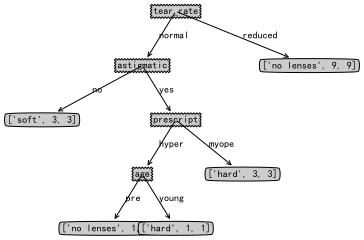

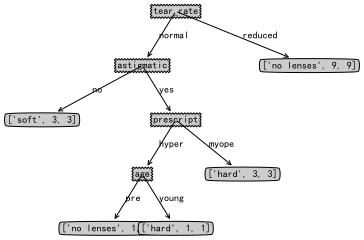

In [99]:
def getMajorLabel(tree):
    labelCount = {}
    allCount = 0
    for value in list(tree.values()):
        if value[0] in labelCount:
            labelCount[value[0]] += value[1]
        else:
            labelCount[value[0]] = value[1]
        allCount += value[1]
    sortedLabelCount = sorted(labelCount.items(),key = lambda x: x[1], reverse=True)
    return sortedLabelCount[0][0], allCount

def checkNode(tree):
    valueList = list(tree.values())
    allValueIsList = True
    for value in valueList:
        allValueIsList = allValueIsList and isinstance(value,list)
        if not allValueIsList:
            break
    return allValueIsList

def getCount(secondDict,testData):
    count = 0
    for key in secondDict.keys():
        count += np.sum(testData[:,-1] == secondDict[key][0])
    return count
# 先根遍历
def pruneTree(tree, testData, featList):
    if not isinstance(tree,dict):
        return tree
    firstFeat = list(tree.keys())[0]
    secondDict = tree[firstFeat]
    featNum = featList.index(firstFeat)
    featureList,subDataSet = splitDataSet(testData, featNum)
    del(featList[featNum])
#     print(featList)
    for key in list(secondDict.keys()):
        if key not in featureList:
            continue
        index = featureList.index(key)
        tree[firstFeat][key] = pruneTree(secondDict[key], subDataSet[index], featList[:])
    if checkNode(secondDict):
#         newTree = copy.deepcopy(tree)
        label, num = getMajorLabel(secondDict)
        preCount = np.sum(testData[:,-1] == label)
        # 确认剪枝
        if preCount > getCount(secondDict,testData):
            print('yes')
            return [label, num,preCount]
    return tree
test_tree_copy = copy.deepcopy(test_tree)
prunedTree = pruneTree(test_tree_copy,np.array(val_data),lenses_labels[:])
createPlot(test_tree)
createPlot(prunedTree)

In [60]:
def traversTree(tree):
    if not isinstance(tree,dict):
        return tree[1],tree[2]
    firstFeat = list(tree.keys())[0]
    secondDict = tree[firstFeat]
    allCount,accCount = 0,0
    for key in list(secondDict.keys()):
        count1, count2= traversTree(secondDict[key])
        allCount += count1
        accCount += count2
    return allCount,accCount

allCount,accCount = traversTree(test_tree)
print(accCount / allCount)

1.0
